In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("./data/developer_survey_2020/survey_results_public.csv")

<IPython.core.display.Javascript object>

In [4]:
schema = pd.read_csv("./data/developer_survey_2020/survey_results_schema.csv")

<IPython.core.display.Javascript object>

In [5]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CompTotal'}>],
       [<AxesSubplot:title={'center':'ConvertedComp'}>,
        <AxesSubplot:title={'center':'WorkWeekHrs'}>]], dtype=object)

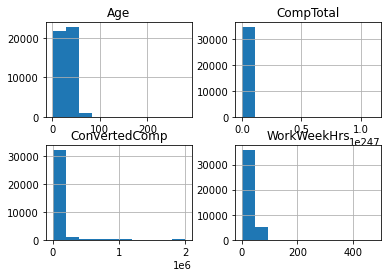

<IPython.core.display.Javascript object>

In [7]:
df[["Age", "CompTotal", "ConvertedComp", "WorkWeekHrs"]].hist()

In [8]:
df["NEWOvertime"].value_counts()

Sometimes: 1-2 days per month but less than weekly          11547
Often: 1-2 days per week or more                            11027
Occasionally: 1-2 days per quarter but less than monthly     9468
Rarely: 1-2 days per year or less                            6471
Never                                                        4718
Name: NEWOvertime, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
df["NEWOvertime"].unique()

array(['Often: 1-2 days per week or more', nan,
       'Occasionally: 1-2 days per quarter but less than monthly',
       'Never', 'Sometimes: 1-2 days per month but less than weekly',
       'Rarely: 1-2 days per year or less'], dtype=object)

<IPython.core.display.Javascript object>

In [10]:
df.MainBranch.unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

<IPython.core.display.Javascript object>

In [11]:
dev = df[df["MainBranch"] == "I am a developer by profession"]

<IPython.core.display.Javascript object>

In [12]:
dev[dev.NEWOvertime.notnull()]["NEWOvertime"].count()

39032

<IPython.core.display.Javascript object>

In [13]:
def get_group_by_df(df, to_group_by):
    """ return overtime data """
    df = pd.DataFrame(
        df.groupby(to_group_by)["NEWOvertime"].count().sort_values(ascending=False)
    )
    df[to_group_by] = df.index
    df.reset_index(inplace=True, drop=True)
    return df

3:80: E501 line too long (83 > 79 characters)


<IPython.core.display.Javascript object>

In [14]:
def get_overtime_group_by_df(df, to_group_by, frequent_overtime):
    """ returns overtime df with in a specific group for frquent time"""
    overtime_df = pd.DataFrame(
        df[df.NEWOvertime == frequent_overtime]
        .groupby(to_group_by)["NEWOvertime"]
        .count()
        .sort_values(ascending=False)
    )
    overtime_df[to_group_by] = overtime_df.index
    overtime_df = overtime_df.rename(columns={"NEWOvertime": "freqeunt_overtime"})
    overtime_df.reset_index(inplace=True, drop=True)
    return overtime_df

9:80: E501 line too long (82 > 79 characters)


<IPython.core.display.Javascript object>

In [15]:
frequent_overtime = "Often: 1-2 days per week or more"

<IPython.core.display.Javascript object>

In [16]:
# Q1: what percent of devs do freqeunt overtime
q1_res = dev["NEWOvertime"].value_counts() / dev.shape[0] * 100
q1_res = pd.DataFrame(q1_res)
q1_res["frequent_overtime(%)"] = q1_res["NEWOvertime"]
q1_res["NEWOvertime"] = q1_res.index
q1_res.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [17]:
print(q1_res)

                                         NEWOvertime  frequent_overtime(%)
0  Sometimes: 1-2 days per month but less than we...             21.963003
1                   Often: 1-2 days per week or more             20.386498
2  Occasionally: 1-2 days per quarter but less th...             18.312038
3                  Rarely: 1-2 days per year or less             12.734940
4                                              Never              9.310703


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='NEWOvertime'>

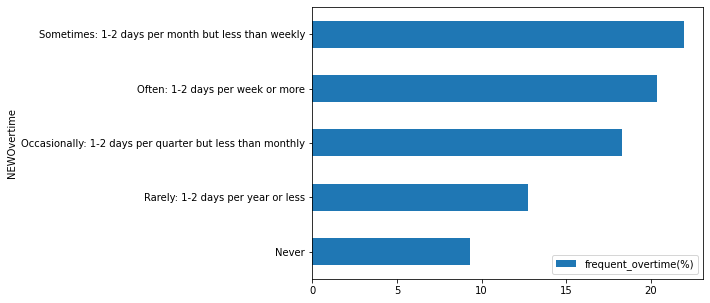

<IPython.core.display.Javascript object>

In [18]:
q1_res.sort_values(by="frequent_overtime(%)").plot(
    x="NEWOvertime", y="frequent_overtime(%)", kind="barh", figsize=(7, 5)
)

In [19]:
# Q2: do small organizations require more frequent overtime.
small_org = get_group_by_df(dev, "OrgSize")
small_org_overtime = get_overtime_group_by_df(dev, "OrgSize", frequent_overtime)

3:80: E501 line too long (80 > 79 characters)


<IPython.core.display.Javascript object>

In [20]:
q2_res = pd.merge(
    small_org_overtime, small_org, left_on=["OrgSize"], right_on=["OrgSize"], how="left"
)
q2_res["frequent_overtime(%)"] = (
    q2_res["freqeunt_overtime"] / q2_res["NEWOvertime"]
) * 100

2:80: E501 line too long (88 > 79 characters)


<IPython.core.display.Javascript object>

In [21]:
q2_res.sort_values(by="frequent_overtime(%)", ascending=False).head(10)

,freqeunt_overtime,OrgSize,NEWOvertime,frequent_overtime(%)
6,666,"Just me - I am a freelancer, sole proprietor, ...",1716,38.811189
2,1313,2 to 9 employees,3889,33.761893
4,992,10 to 19 employees,3677,26.978515
0,2112,20 to 99 employees,8543,24.721995
3,1174,"10,000 or more employees",5148,22.804973
1,1591,100 to 499 employees,7297,21.803481
7,534,500 to 999 employees,2489,21.454399
8,305,"5,000 to 9,999 employees",1484,20.552561
5,779,"1,000 to 4,999 employees",4051,19.229820


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='OrgSize'>

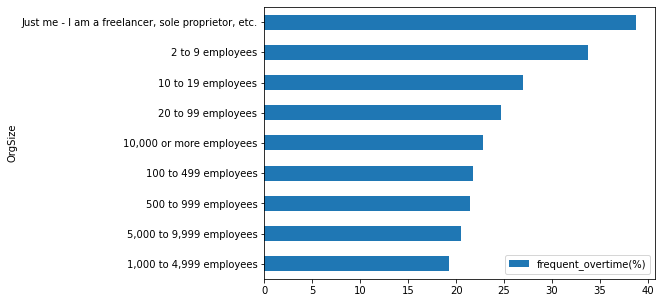

<IPython.core.display.Javascript object>

In [22]:
q2_res.sort_values(by="frequent_overtime(%)", ascending=True).plot(
    y="frequent_overtime(%)", x="OrgSize", kind="barh", figsize=(7, 5)
)

In [23]:
# Q3 which country has highest frequent overtime percentage.
country = get_group_by_df(dev, "Country")
country_overtime = get_overtime_group_by_df(dev, "Country", frequent_overtime)

<IPython.core.display.Javascript object>

In [24]:
q3_res = pd.merge(
    country_overtime, country, left_on=["Country"], right_on=["Country"], how="left"
)
q3_res["frequent_overtime(%)"] = (
    q3_res["freqeunt_overtime"] / q3_res["NEWOvertime"]
) * 100

2:80: E501 line too long (84 > 79 characters)


<IPython.core.display.Javascript object>

In [25]:
q3_res["frequent_overtime(%)"] = (
    q3_res["freqeunt_overtime"] / q3_res["NEWOvertime"]
) * 100

<IPython.core.display.Javascript object>

In [26]:
q3_res = q3_res.sort_values(by="NEWOvertime", ascending=False).head(10)

<IPython.core.display.Javascript object>

In [27]:
q3_res.sort_values(by="frequent_overtime(%)", ascending=False)

,freqeunt_overtime,Country,NEWOvertime,frequent_overtime(%)
1,1475,India,4323,34.119824
4,345,France,1195,28.870293
5,307,Brazil,1168,26.284247
2,627,Germany,2498,25.100080
8,196,Australia,824,23.786408
0,1744,United States,8375,20.823881
6,275,Canada,1411,19.489724
3,515,United Kingdom,2670,19.288390
12,145,Netherlands,881,16.458570
13,136,Poland,874,15.560641


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Country'>

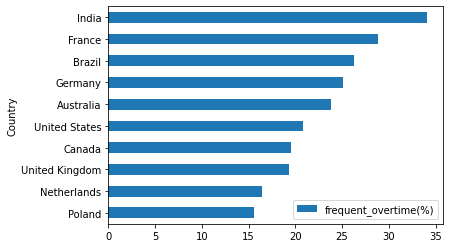

<IPython.core.display.Javascript object>

In [28]:
q3_res.sort_values(by="frequent_overtime(%)", ascending=True).plot(
    y="frequent_overtime(%)", x="Country", kind="barh"
)